# Customer churn in Banking
The rate at which a business loses their customers, its more expensive to retain you customers than acquire someone new, there are various ways in which a customer could get churned depending on the nature of the product or service and how the customer is linked to the business.

## A customer lifecycle is highlighted below :

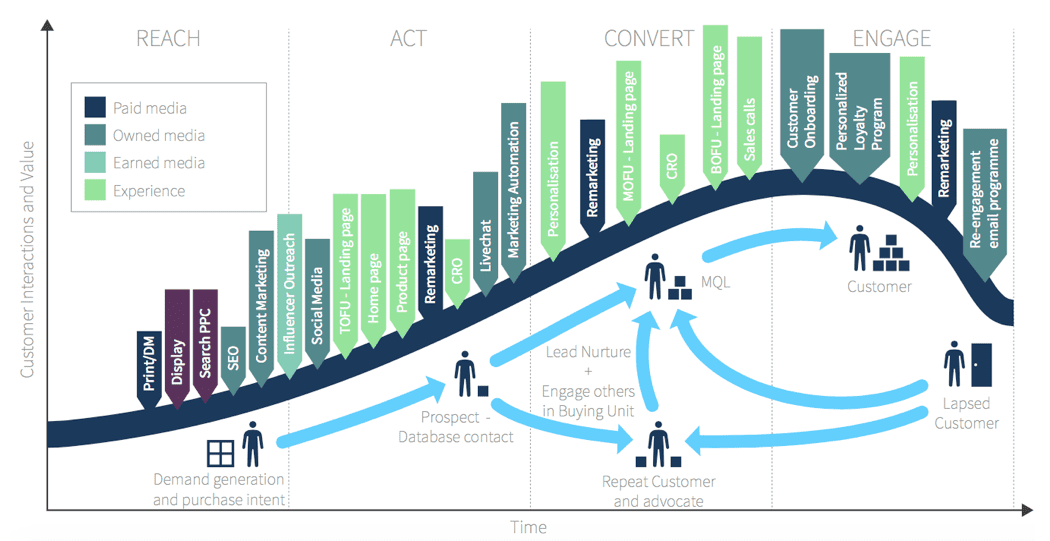


The Churn map gives a clear illustration of the diffrent churn pools and the thought process of a customer landing on one of the segments.

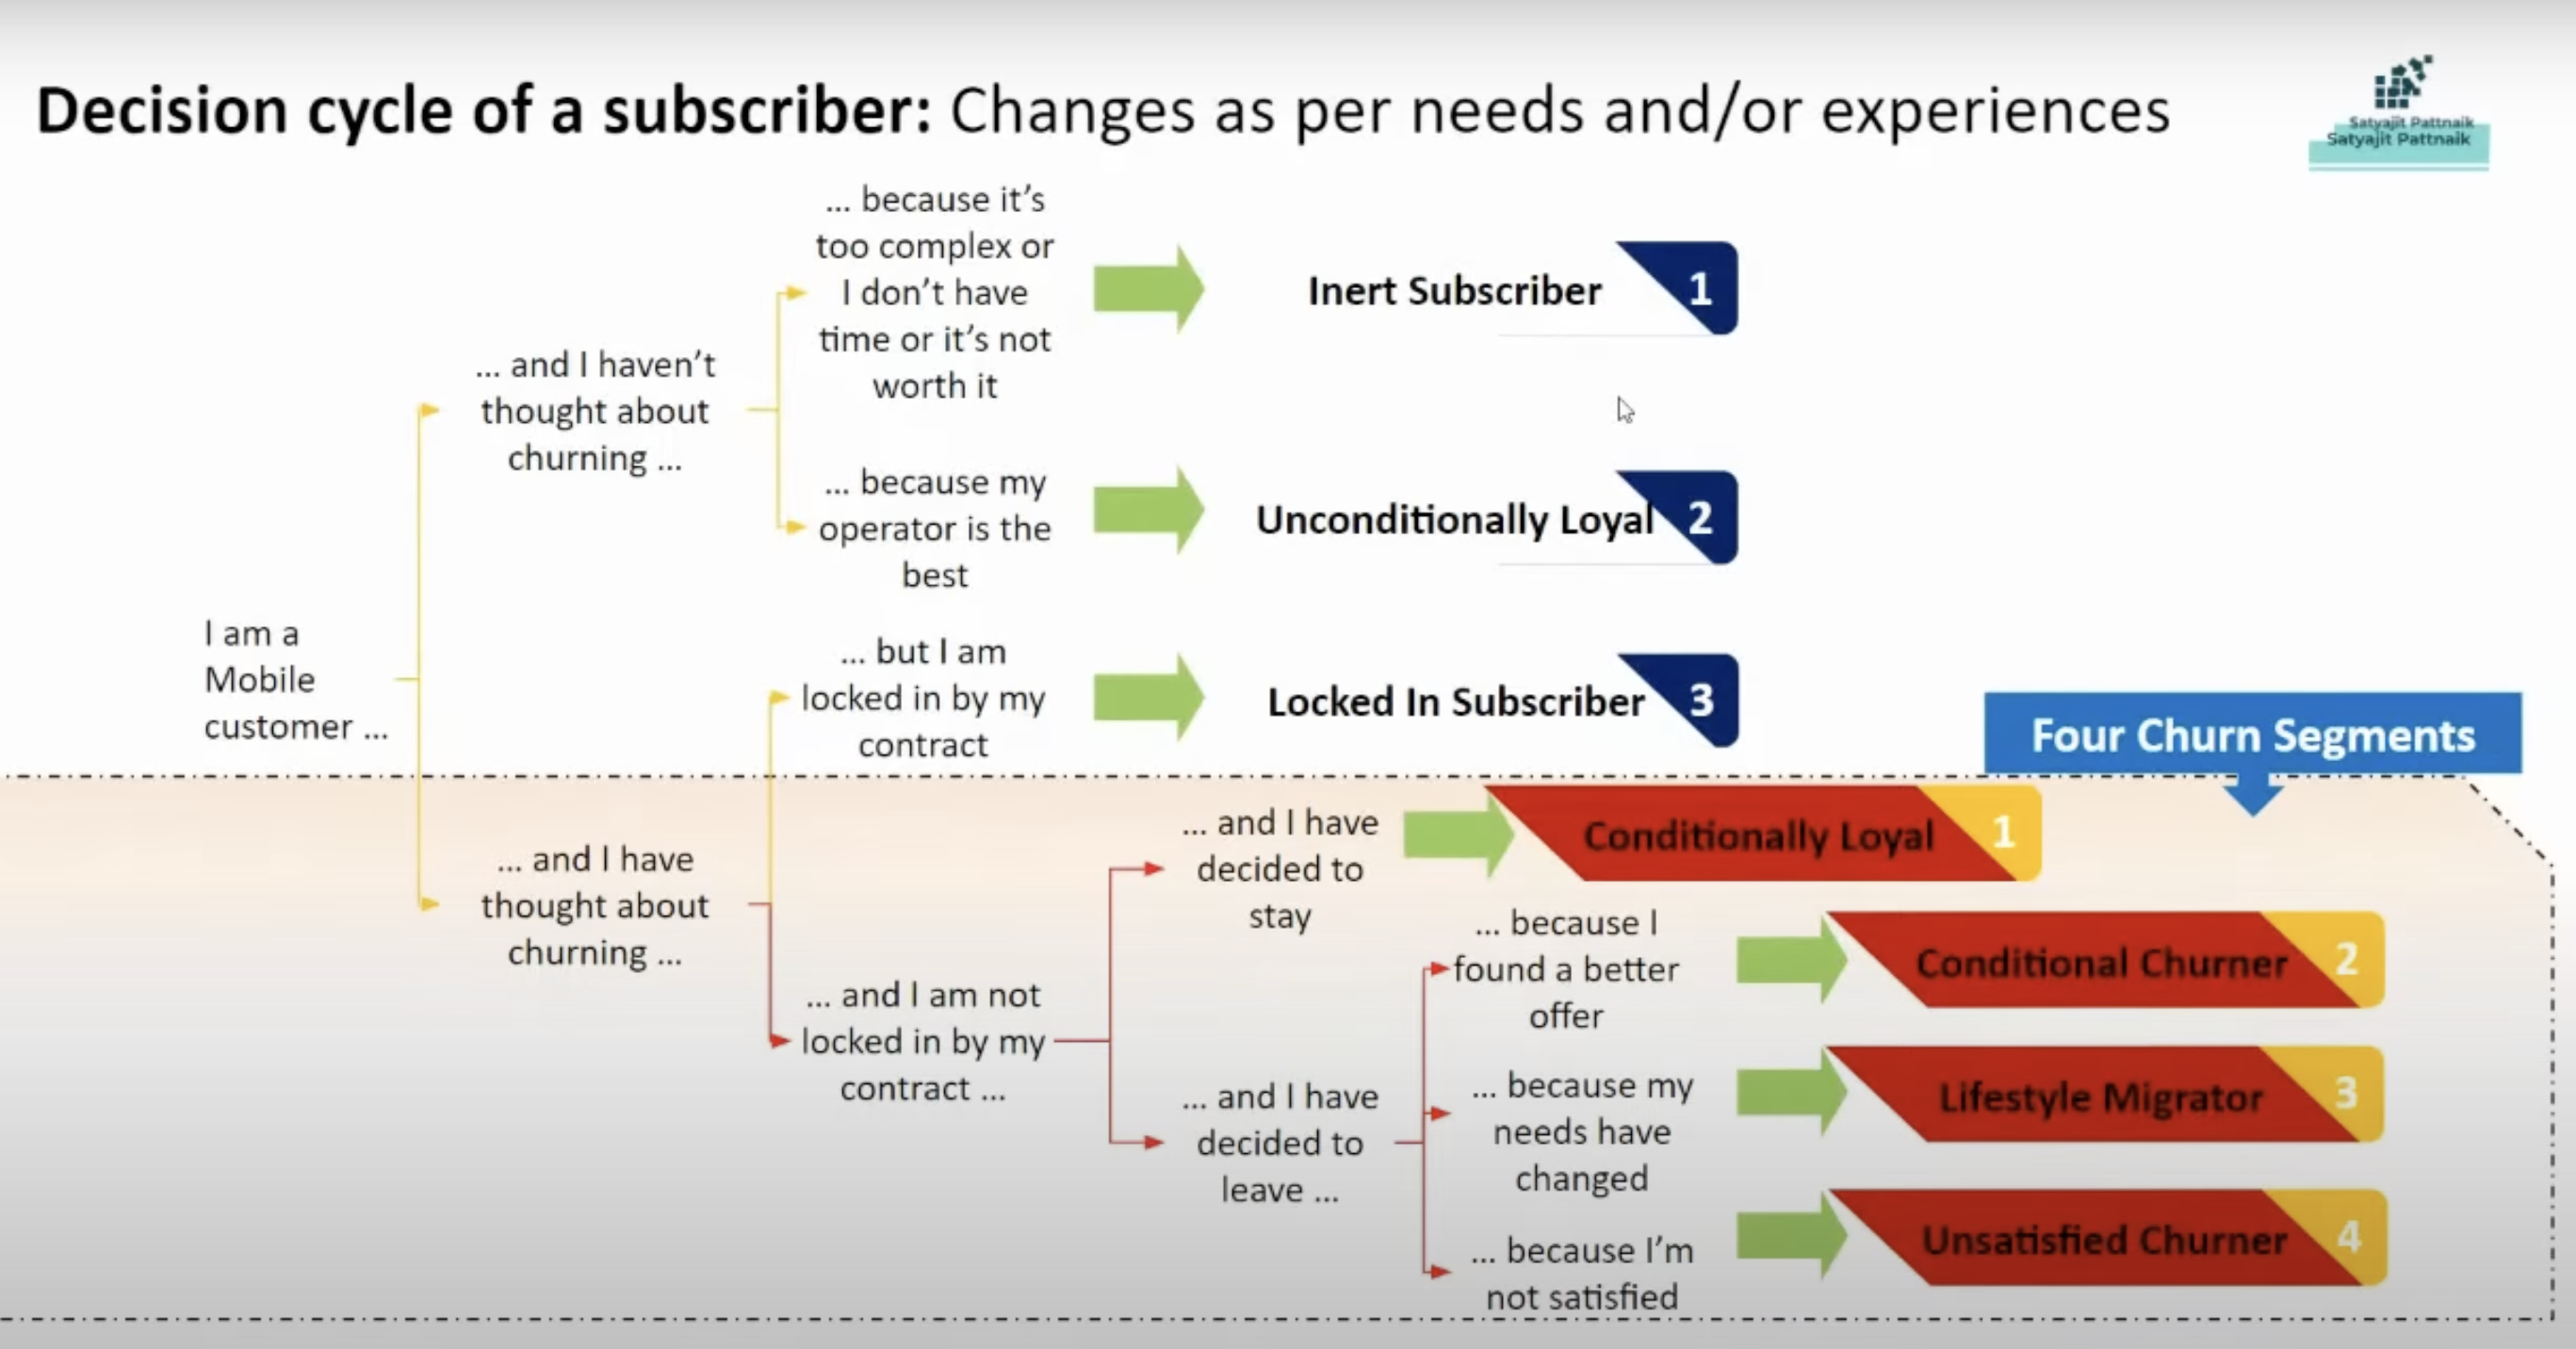

## For this project we will only be predicting whether the customer is a churner or non- churner as a bank customer using a credit card

The way we would predict whether a new customer could churn within the next six months boils down to understanding the characteristics of the customers who have churned and modeling that information.


## Data loading and preparation

The following will be our approach of being data centric until we put out a well furnished model.

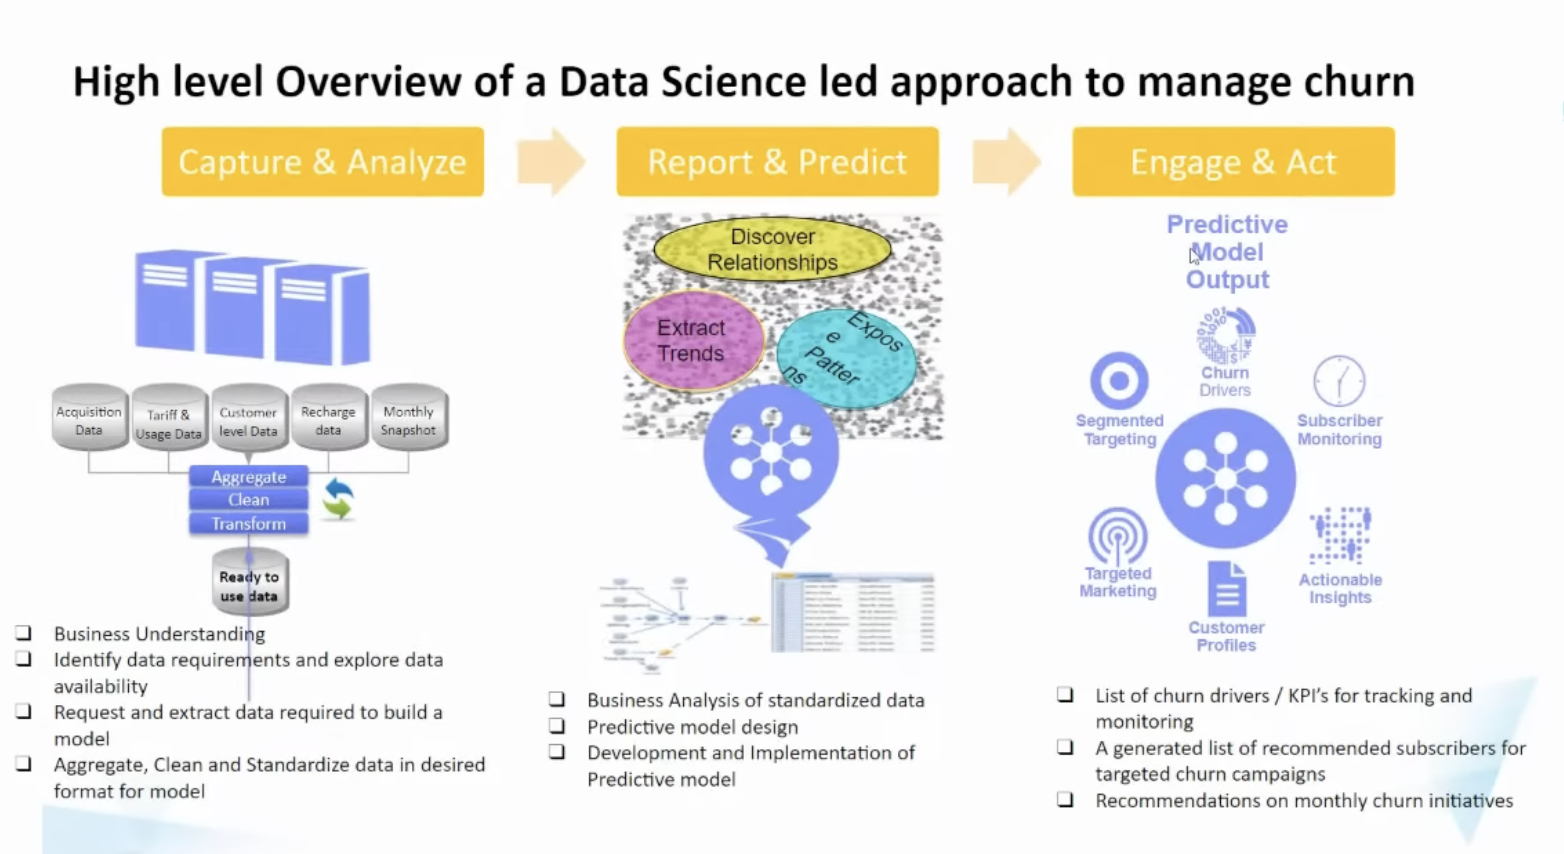

In [12]:
# Import the packages 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [13]:
df = pd.read_csv("/Users/maneth/Desktop/Churn_Modelling.csv")

In [14]:
df

RowNumber  CustomerId    Surname  CreditScore Geography  Gender  Age  \
0             1    15634602   Hargrave          619    France  Female   42   
1             2    15647311       Hill          608     Spain  Female   41   
2             3    15619304       Onio          502    France  Female   42   
3             4    15701354       Boni          699    France  Female   39   
4             5    15737888   Mitchell          850     Spain  Female   43   
...         ...         ...        ...          ...       ...     ...  ...   
9995       9996    15606229   Obijiaku          771    France    Male   39   
9996       9997    15569892  Johnstone          516    France    Male   35   
9997       9998    15584532        Liu          709    France  Female   36   
9998       9999    15682355  Sabbatini          772   Germany    Male   42   
9999      10000    15628319     Walker          792    France  Female   28   

      Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0          2       0.00              1          1               1   
1          1   83807.86              1          0               1   
2          8  159660.80              3          1               0   
3          1       0.00              2          0               0   
4          2  125510.82              1          1               1   
...      ...        ...            ...        ...             ...   
9995       5       0.00              2          1               0   
9996      10   57369.61              1          1               1   
9997       7       0.00              1          0               1   
9998       3   75075.31              2          1               0   
9999       4  130142.79              1          1               0   

      EstimatedSalary  Exited  
0           101348.88       1  
1           112542.58       0  
2           113931.57       1  
3            93826.63       0  
4            79084.10       0  
...               ...     ...  
9995         96270.64       0  
9996        101699.77       0  
9997         42085.58       1  
9998         92888.52       1  
9999         38190.78       0  

[10000 rows x 14 columns]

In [15]:
df.head()

RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0          1    15634602  Hargrave          619    France  Female   42   
1          2    15647311      Hill          608     Spain  Female   41   
2          3    15619304      Onio          502    France  Female   42   
3          4    15701354      Boni          699    France  Female   39   
4          5    15737888  Mitchell          850     Spain  Female   43   

   Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0       2       0.00              1          1               1   
1       1   83807.86              1          0               1   
2       8  159660.80              3          1               0   
3       1       0.00              2          0               0   
4       2  125510.82              1          1               1   

   EstimatedSalary  Exited  
0        101348.88       1  
1        112542.58       0  
2        113931.57       1  
3         93826.63       0  
4         79084.10       0

In [16]:
df.describe()

RowNumber    CustomerId   CreditScore           Age        Tenure  \
count  10000.00000  1.000000e+04  10000.000000  10000.000000  10000.000000   
mean    5000.50000  1.569094e+07    650.528800     38.921800      5.012800   
std     2886.89568  7.193619e+04     96.653299     10.487806      2.892174   
min        1.00000  1.556570e+07    350.000000     18.000000      0.000000   
25%     2500.75000  1.562853e+07    584.000000     32.000000      3.000000   
50%     5000.50000  1.569074e+07    652.000000     37.000000      5.000000   
75%     7500.25000  1.575323e+07    718.000000     44.000000      7.000000   
max    10000.00000  1.581569e+07    850.000000     92.000000     10.000000   

             Balance  NumOfProducts    HasCrCard  IsActiveMember  \
count   10000.000000   10000.000000  10000.00000    10000.000000   
mean    76485.889288       1.530200      0.70550        0.515100   
std     62397.405202       0.581654      0.45584        0.499797   
min         0.000000       1.000000      0.00000        0.000000   
25%         0.000000       1.000000      0.00000        0.000000   
50%     97198.540000       1.000000      1.00000        1.000000   
75%    127644.240000       2.000000      1.00000        1.000000   
max    250898.090000       4.000000      1.00000        1.000000   

       EstimatedSalary        Exited  
count     10000.000000  10000.000000  
mean     100090.239881      0.203700  
std       57510.492818      0.402769  
min          11.580000      0.000000  
25%       51002.110000      0.000000  
50%      100193.915000      0.000000  
75%      149388.247500      0.000000  
max      199992.480000      1.000000

In [17]:
df.columns.to_list()

['RowNumber',
 'CustomerId',
 'Surname',
 'CreditScore',
 'Geography',
 'Gender',
 'Age',
 'Tenure',
 'Balance',
 'NumOfProducts',
 'HasCrCard',
 'IsActiveMember',
 'EstimatedSalary',
 'Exited']

In [8]:
print("Number of Rows:", df.shape[0])
print("Number of Columns:", df.shape[1])

Number of Rows: 10000
Number of Columns: 14


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [11]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [18]:
df = df.drop(['RowNumber','CustomerId','Surname'],axis=1)

In [19]:
df

CreditScore Geography  Gender  Age  Tenure    Balance  NumOfProducts  \
0             619    France  Female   42       2       0.00              1   
1             608     Spain  Female   41       1   83807.86              1   
2             502    France  Female   42       8  159660.80              3   
3             699    France  Female   39       1       0.00              2   
4             850     Spain  Female   43       2  125510.82              1   
...           ...       ...     ...  ...     ...        ...            ...   
9995          771    France    Male   39       5       0.00              2   
9996          516    France    Male   35      10   57369.61              1   
9997          709    France  Female   36       7       0.00              1   
9998          772   Germany    Male   42       3   75075.31              2   
9999          792    France  Female   28       4  130142.79              1   

      HasCrCard  IsActiveMember  EstimatedSalary  Exited  
0             1               1        101348.88       1  
1             0               1        112542.58       0  
2             1               0        113931.57       1  
3             0               0         93826.63       0  
4             1               1         79084.10       0  
...         ...             ...              ...     ...  
9995          1               0         96270.64       0  
9996          1               1        101699.77       0  
9997          0               1         42085.58       1  
9998          1               0         92888.52       1  
9999          1               0         38190.78       0  

[10000 rows x 11 columns]

In [20]:
df['Geography'].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

## An illustration of the customers retainment per country

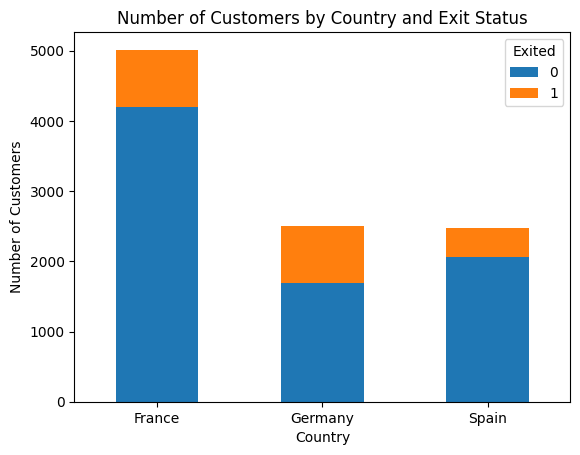

In [24]:

# Group the data by 'Geography' and 'Exited' and count the number of occurrences
grouped_data = df.groupby(['Geography', 'Exited']).size().unstack(fill_value=0)

# Plot the data
ax = grouped_data.plot(kind='bar', stacked=True)
plt.xlabel('Country')
plt.ylabel('Number of Customers')
plt.title('Number of Customers by Country and Exit Status')
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)

plt.show()

### Analysis
France has the highest number of customers churned and the least in Germany, Spain shows more loyalty by the ratio to churned and unchurned customers being low. 

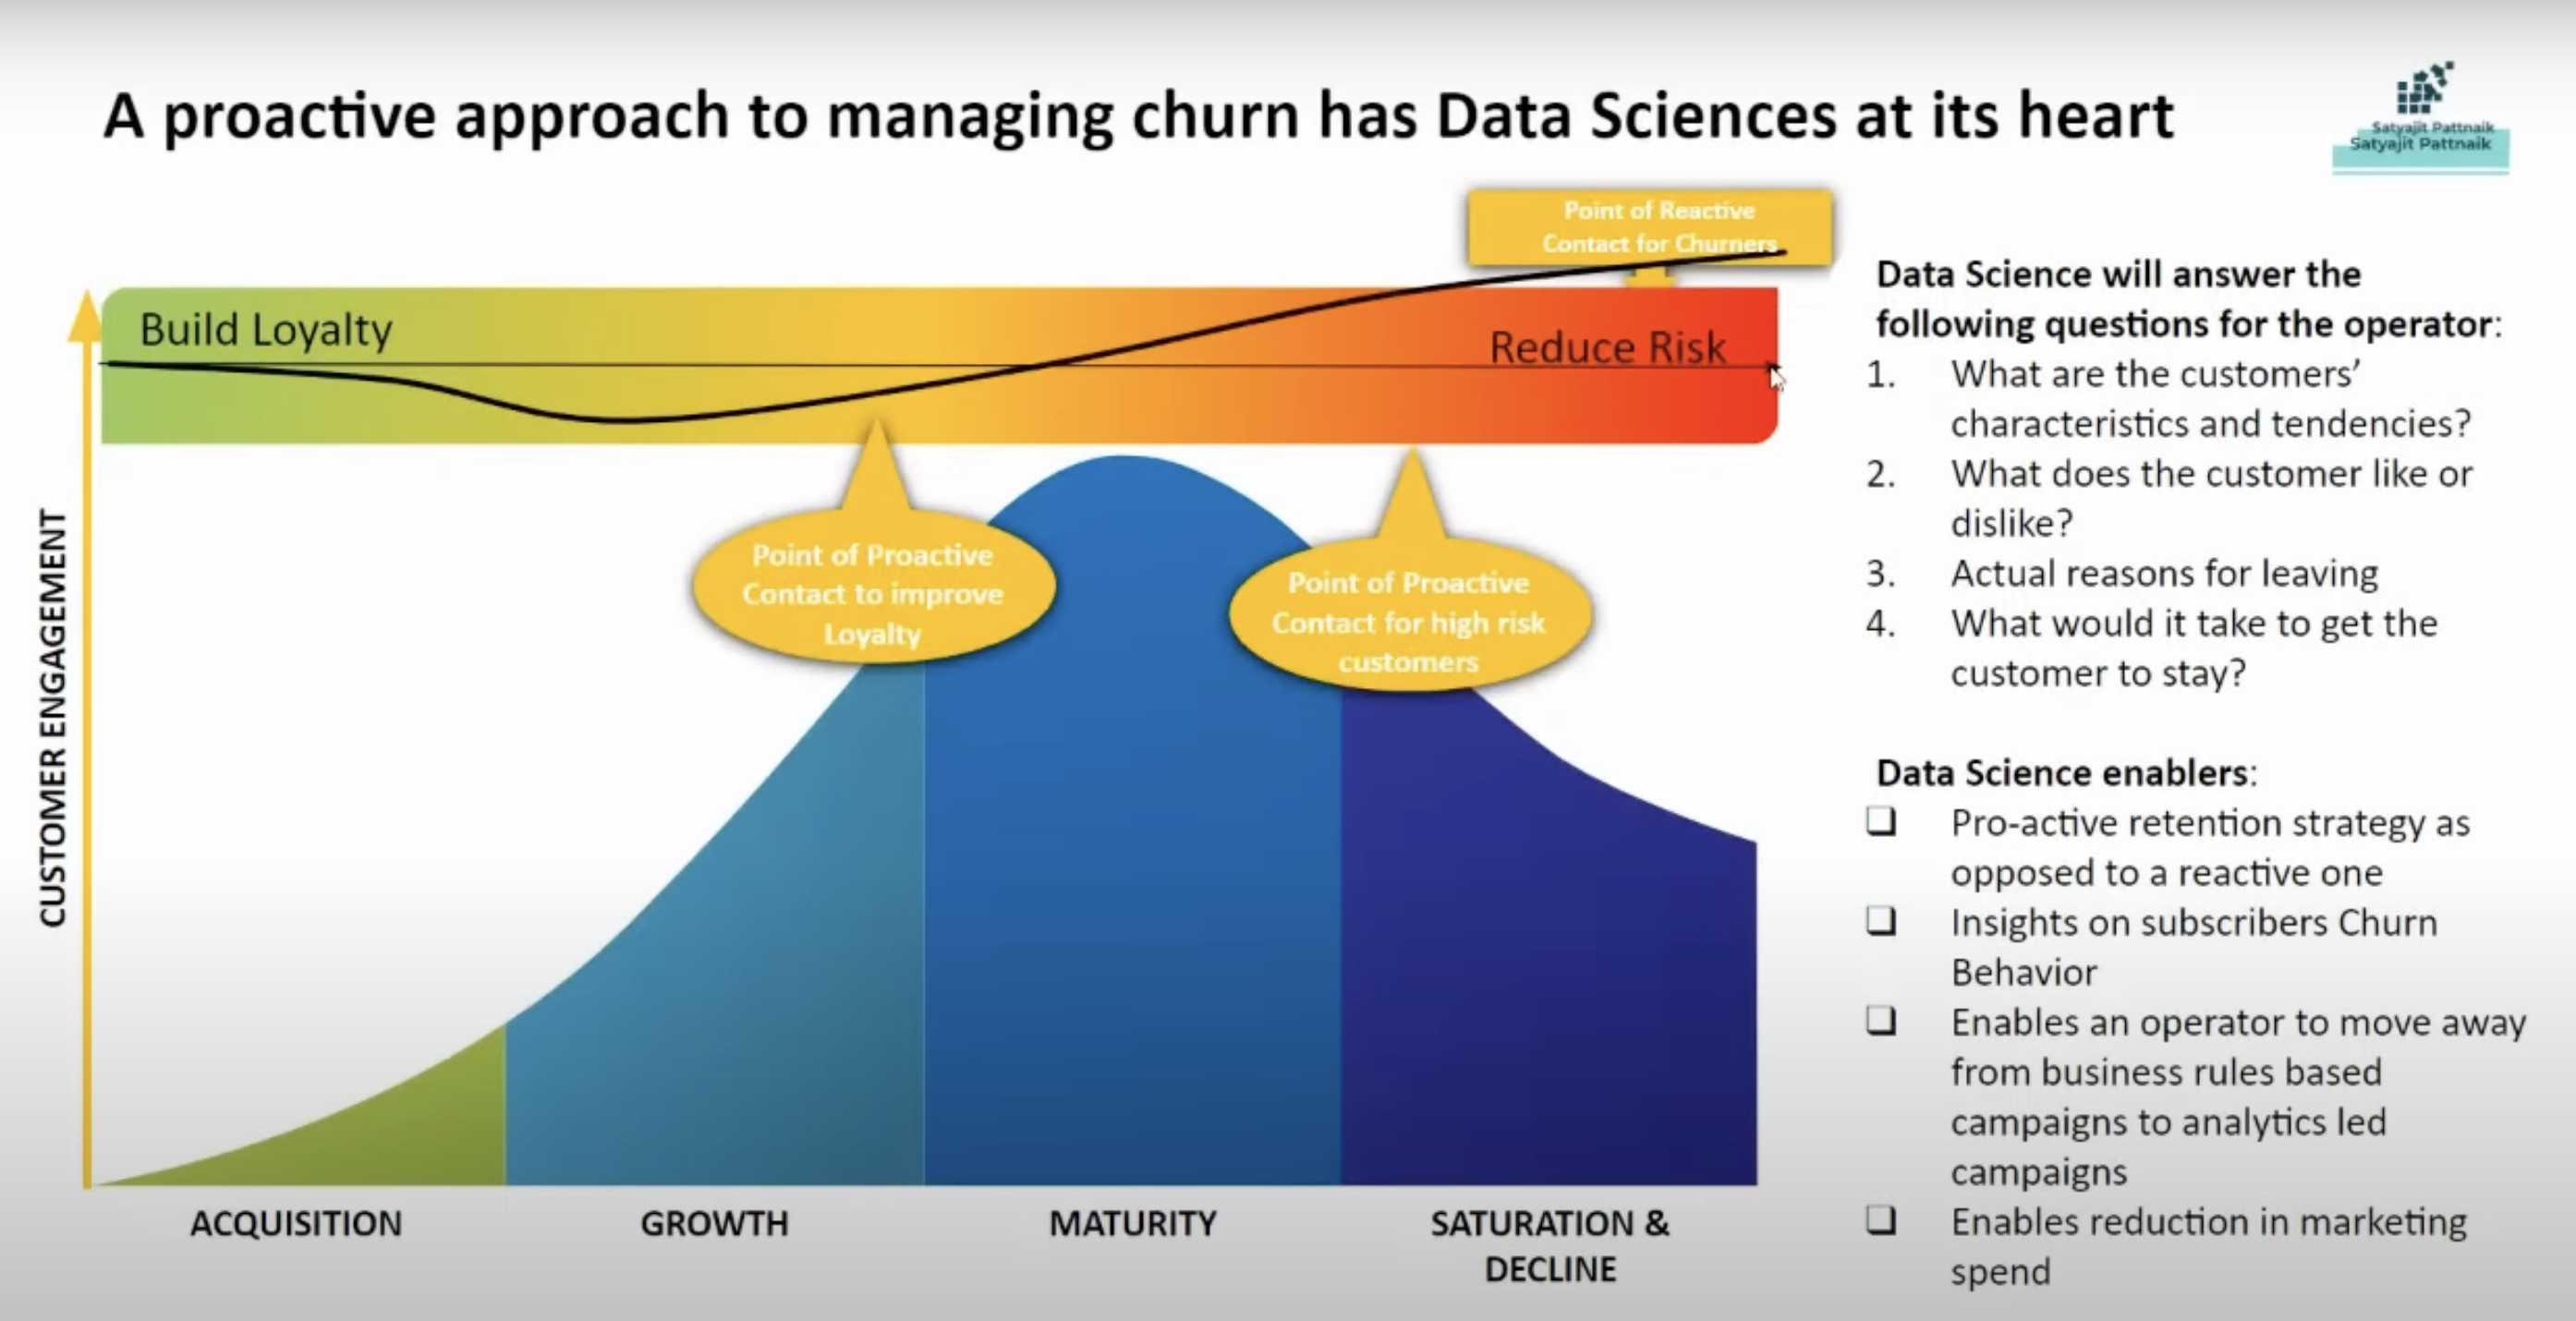

### Encdoing categorical data
Preparing data to be fed into the ML model

In [25]:
df = pd.get_dummies(df,drop_first=True)

In [26]:
df

CreditScore  Age  Tenure    Balance  NumOfProducts  HasCrCard  \
0             619   42       2       0.00              1          1   
1             608   41       1   83807.86              1          0   
2             502   42       8  159660.80              3          1   
3             699   39       1       0.00              2          0   
4             850   43       2  125510.82              1          1   
...           ...  ...     ...        ...            ...        ...   
9995          771   39       5       0.00              2          1   
9996          516   35      10   57369.61              1          1   
9997          709   36       7       0.00              1          0   
9998          772   42       3   75075.31              2          1   
9999          792   28       4  130142.79              1          1   

      IsActiveMember  EstimatedSalary  Exited  Geography_Germany  \
0                  1        101348.88       1              False   
1                  1        112542.58       0              False   
2                  0        113931.57       1              False   
3                  0         93826.63       0              False   
4                  1         79084.10       0              False   
...              ...              ...     ...                ...   
9995               0         96270.64       0              False   
9996               1        101699.77       0              False   
9997               1         42085.58       1              False   
9998               0         92888.52       1               True   
9999               0         38190.78       0              False   

      Geography_Spain  Gender_Male  
0               False        False  
1                True        False  
2               False        False  
3               False        False  
4                True        False  
...               ...          ...  
9995            False         True  
9996            False         True  
9997            False        False  
9998            False         True  
9999            False        False  

[10000 rows x 12 columns]

In [27]:
df.head()

CreditScore  Age  Tenure    Balance  NumOfProducts  HasCrCard  \
0          619   42       2       0.00              1          1   
1          608   41       1   83807.86              1          0   
2          502   42       8  159660.80              3          1   
3          699   39       1       0.00              2          0   
4          850   43       2  125510.82              1          1   

   IsActiveMember  EstimatedSalary  Exited  Geography_Germany  \
0               1        101348.88       1              False   
1               1        112542.58       0              False   
2               0        113931.57       1              False   
3               0         93826.63       0              False   
4               1         79084.10       0              False   

   Geography_Spain  Gender_Male  
0            False        False  
1             True        False  
2            False        False  
3            False        False  
4             True        False

#### Working with the target values 

In [28]:
df['Exited'].value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

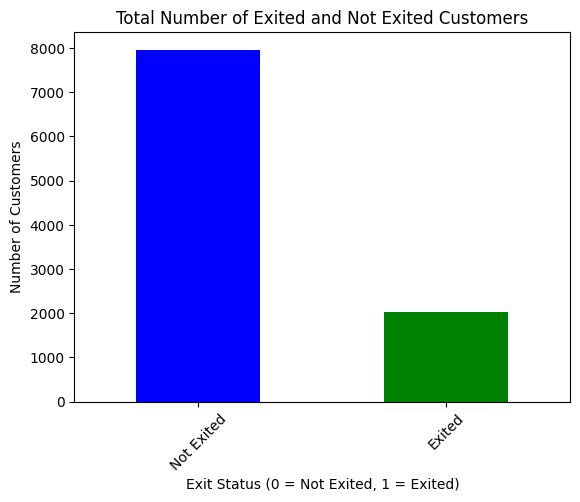

In [37]:
exit_counts = df['Exited'].value_counts()

# Create a bar graph
exit_counts.plot(kind='bar', color=['blue', 'green'])
plt.xlabel('Exit Status (0 = Not Exited, 1 = Exited)')
plt.ylabel('Number of Customers')
plt.title('Total Number of Exited and Not Exited Customers')
plt.xticks([0, 1], ['Not Exited', 'Exited'])
plt.xticks(rotation=45)
plt.show()

#### Collecting dependent and independent variables

In [38]:
x = df.drop('Exited',axis=1)
x

CreditScore  Age  Tenure    Balance  NumOfProducts  ...  IsActiveMember  \
0             619   42       2       0.00              1  ...               1   
1             608   41       1   83807.86              1  ...               1   
2             502   42       8  159660.80              3  ...               0   
3             699   39       1       0.00              2  ...               0   
4             850   43       2  125510.82              1  ...               1   
...           ...  ...     ...        ...            ...  ...             ...   
9995          771   39       5       0.00              2  ...               0   
9996          516   35      10   57369.61              1  ...               1   
9997          709   36       7       0.00              1  ...               1   
9998          772   42       3   75075.31              2  ...               0   
9999          792   28       4  130142.79              1  ...               0   

      EstimatedSalary  Geography_Germany  Geography_Spain  Gender_Male  
0           101348.88              False            False        False  
1           112542.58              False             True        False  
2           113931.57              False            False        False  
3            93826.63              False            False        False  
4            79084.10              False             True        False  
...               ...                ...              ...          ...  
9995         96270.64              False            False         True  
9996        101699.77              False            False         True  
9997         42085.58              False            False        False  
9998         92888.52               True            False         True  
9999         38190.78              False            False        False  

[10000 rows x 11 columns]

In [39]:
y = df['Exited']

In [40]:
y

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64

### Handling Imbalance data using SMOTE

In [67]:
!pip3 install -U imbalanced-learn --quiet

101173.07s - pydevd: Sending message related to process being replaced timed-out after 5 seconds

[notice] A new release of pip is available: 23.2.1 -> 23.3
[notice] To update, run: python3.11 -m pip install --upgrade pip


In [115]:
from imblearn.over_sampling import SMOTE

In [116]:
x_res, y_res = SMOTE().fit_resample(x,y)

In [117]:
y_res.value_counts()

Exited
1    7963
0    7963
Name: count, dtype: int64

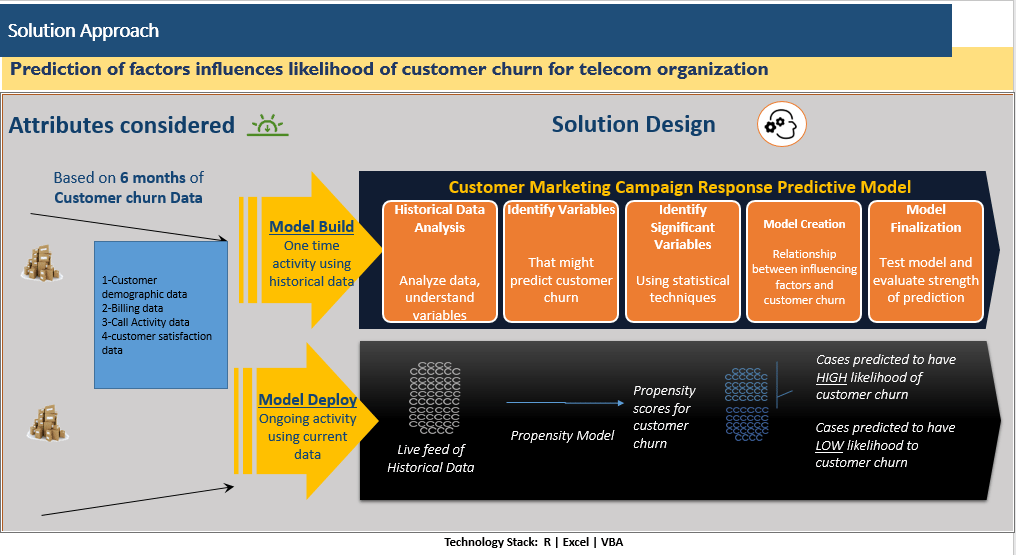

## Splitting the data to Training and Testing sets 

In [118]:
from sklearn.model_selection import train_test_split

In [149]:
x_train,x_test,y_train,y_test = train_test_split(x_res,y_res,test_size=0.2,random_state=42)

#### Feature Scaling 
Allows us to put features to the same scale, feature scaling is essential if we are measuring distances with data and not let high values dominate

In [150]:
from sklearn.preprocessing import StandardScaler

In [151]:
sc = StandardScaler()

In [152]:
X_train = sc.fit_transform(x_train)
X_test = sc.fit_transform(x_test)

In [153]:
X_train

array([[ 0.04702001,  0.60571986,  0.81085019, ...,  1.30571177,
        -0.6342803 ,  0.81396207],
       [ 1.0994971 ,  0.10324089, -1.40111185, ..., -0.76586581,
        -0.6342803 ,  0.81396207],
       [ 1.85596501, -1.00221285, -0.29513083, ...,  1.30571177,
        -0.6342803 ,  0.81396207],
       ...,
       [ 0.20050625,  0.20373669,  1.17951052, ..., -0.76586581,
        -0.6342803 ,  0.81396207],
       [ 0.05798331, -0.39923808,  0.07352951, ..., -0.76586581,
         1.57659003, -1.22855847],
       [ 0.52940534,  1.00770304, -1.40111185, ...,  1.30571177,
        -0.6342803 ,  0.81396207]])

## Choosing the ML model
Since the target value is of two types, a classification linear model would be a perfect fit and the best out of all the options would be the following models : 
1.Logistic Regression model,
2.SVC - Support Vector Classfier,
3.K-Neighbors Classifier 

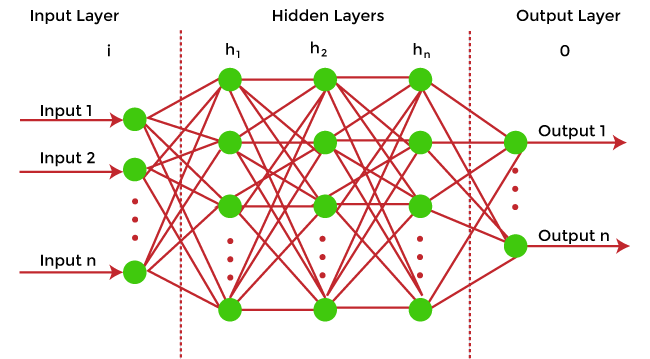

## Logistic Regression 

In [154]:
from sklearn.linear_model import LogisticRegression

In [155]:
log = LogisticRegression()

In [156]:
log.fit(X_train, y_train)

LogisticRegression()

In [157]:
y_predict = log.predict(X_test)

In [145]:
from sklearn.metrics import accuracy_score

In [146]:
accuracy_score(y_test,y_predict)

0.809

In [129]:
accuracy_score(y_test,y_predict) # After handling the imbalanced data 

0.7790332705586943

In [148]:
# Since dataset is imbalanced we run the following errors 
from sklearn.metrics import precision_score,recall_score,f1_score
precision = precision_score(y_test, y_predict)
recall = recall_score(y_test, y_predict)
f1_score = f1_score(y_test, y_predict)

print(f"The precision score is: {precision:.3f}") # To correctly predict the postives out of all the postive preds made 
print(f"The recall score is: {recall:.3f}")
print(f"The f1_score score is: {f1_score:.3f}")

The precision score is: 0.594
The recall score is: 0.194
The f1_score score is: 0.293


In [159]:
from sklearn.metrics import precision_score,recall_score,f1_score
precision = precision_score(y_test, y_predict)
recall = recall_score(y_test, y_predict)
f1_score = f1_score(y_test, y_predict)

print("After the imbalanced values were handled with SMOTE")
print(f"The precision score is: {precision:.3f}") # To correctly predict the postives out of all the postive preds made 
print(f"The recall score is: {recall:.3f}")
print(f"The f1_score score is: {f1_score:.3f}")

After the imbalanced values were handled with SMOTE
The precision score is: 0.765
The recall score is: 0.788
The f1_score score is: 0.777


## SVC - Support Vector Classfier

In [160]:
from sklearn import svm

In [161]:
svm = svm.SVC()

In [171]:
svm.fit(X_train, y_train)

SVC()

In [172]:
y_predSVC = svm.predict(X_test)

In [173]:
accuracy_score(y_test,y_predSVC)

0.8465160075329566

In [207]:
precisionSVC = precision_score(y_test, y_predSVC)
print(f"The precision score is: {precisionSVC:.3f}")

The precision score is: 0.843


## KNeighbors Classifier 

In [167]:
from sklearn.neighbors import KNeighborsClassifier

In [168]:
knn = KNeighborsClassifier()

In [169]:
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [175]:
y_predKNN = knn.predict(X_test)

In [176]:
accuracy_score(y_test,y_predKNN)

0.8223477715003139

In [208]:
precisionKNN = precision_score(y_test, y_predKNN)
print(f"The precision score is: {precisionKNN:.3f}")

The precision score is: 0.806


## Decision Tree Classifier

In [178]:
from sklearn.tree import DecisionTreeClassifier 

In [187]:
dt = DecisionTreeClassifier()

In [188]:
dt.fit(X_train,y_train)

DecisionTreeClassifier()

In [189]:
y_predDT = dt.predict(X_test)

In [190]:
accuracy_score(y_test,y_predDT)

0.8019460138104206

In [209]:
precisionDT = precision_score(y_test, y_predDT)
print(f"The precision score is: {precisionDT:.3f}")

The precision score is: 0.785


## Random Forest Classifier 

In [192]:
from sklearn.ensemble import RandomForestClassifier

In [195]:
rf = RandomForestClassifier()

In [196]:
rf.fit(X_train,y_train)

RandomForestClassifier()

In [197]:
y_predRF = rf.predict(X_test)

In [198]:
accuracy_score(y_test,y_predRF)

0.869428750784683

In [210]:
precisionRF = precision_score(y_test, y_predRF)
print(f"The precision score is: {precisionRF:.3f}")

The precision score is: 0.868


## Gradient Boosting Classifier

In [200]:
from sklearn.ensemble import GradientBoostingClassifier

In [201]:
gbc = GradientBoostingClassifier()

In [202]:
gbc.fit(X_train,y_train)

GradientBoostingClassifier()

In [203]:
y_predGBC = gbc.predict(X_test)

In [204]:
accuracy_score(y_test,y_predGBC)

0.8414940364092907

In [211]:
precisionGBC = precision_score(y_test, y_predGBC)
print(f"The precision score is: {precisionGBC:.3f}")

The precision score is: 0.837


-- Ending of model testing --

In [212]:
final_data = pd.DataFrame({'Models':['LR','SVC','KNN','DT','RF','GBC'],
                          'Accuracy':[accuracy_score(y_test,y_predict),
                                      accuracy_score(y_test,y_predSVC),
                                      accuracy_score(y_test,y_predKNN),
                                      accuracy_score(y_test,y_predDT),
                                      accuracy_score(y_test,y_predRF),
                                      accuracy_score(y_test,y_predGBC)],
                           'Precision Accuracy' : [precision,precisionSVC,precisionKNN,precisionDT,precisionRF,precisionGBC]})

In [213]:
final_data

Models  Accuracy  Precision Accuracy
0     LR  0.779033            0.837194
1    SVC  0.846516            0.843226
2    KNN  0.822348            0.805952
3     DT  0.801946            0.784920
4     RF  0.869429            0.868438
5    GBC  0.841494            0.837194

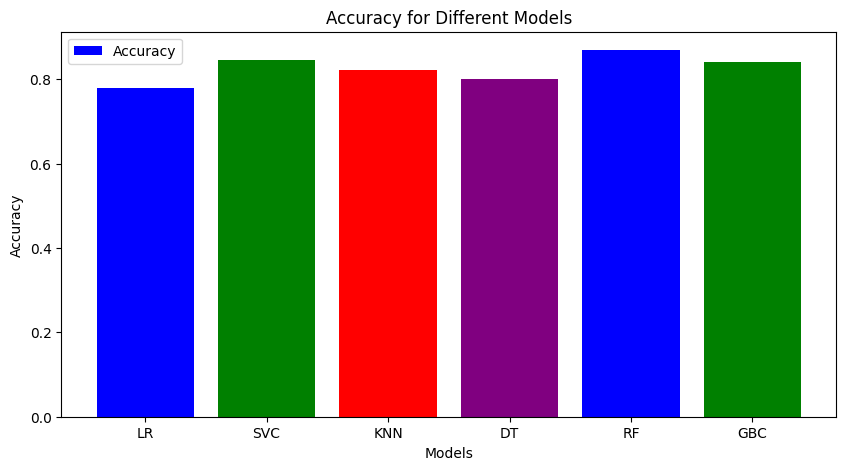

In [216]:
# Create a bar graph for accuracy
colors = ['blue', 'green', 'red', 'purple']
plt.figure(figsize=(10, 5))
plt.bar(final_data['Models'], final_data['Accuracy'],color=colors, label='Accuracy')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Accuracy for Different Models')
plt.legend()
plt.show()

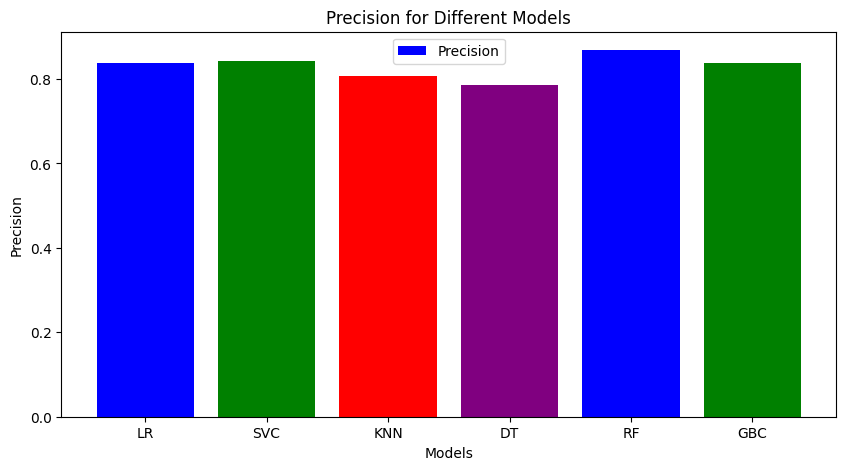

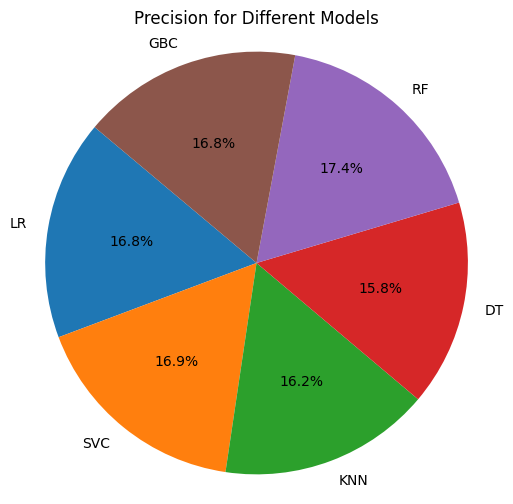

In [220]:

colors = ['blue', 'green', 'red', 'purple']
plt.figure(figsize=(10, 5))
plt.bar(final_data['Models'], final_data['Precision Accuracy'],color=colors, label='Precision')
plt.xlabel('Models')
plt.ylabel('Precision')
plt.title('Precision for Different Models')
plt.legend()
plt.show()

plt.figure(figsize=(6, 6))
plt.pie(final_data['Precision Accuracy'], labels=final_data['Models'], autopct='%1.1f%%', startangle=140)
plt.axis('equal')
plt.title('Precision for Different Models')
plt.show()

## Final testing and Deployment
According to the accuracy reports the we will be going ahead with the Random Forest Model 

In [221]:
X_res = sc.fit_transform(x_res)

In [222]:
rf.fit(X_res, y_res)

RandomForestClassifier()

In [223]:
!pip3 install joblib --quiet

106273.17s - pydevd: Sending message related to process being replaced timed-out after 5 seconds

[notice] A new release of pip is available: 23.2.1 -> 23.3
[notice] To update, run: python3.11 -m pip install --upgrade pip


In [241]:
# Using joblib to save the model 
import joblib
joblib.dump(rf,'Bank_churn_model')

['Bank_churn_model']

### Implementing the model

In [242]:
modelcheck = joblib.load('Bank_churn_model')

In [243]:
df.columns

Index(['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited', 'Geography_Germany',
       'Geography_Spain', 'Gender_Male'],
      dtype='object')

## Outputs

In [258]:
result1 = modelcheck.predict([[619, 42, 2, 0.0, 0, 0, 0, 11.34, 0, 0, 0]])
if result == 1:
    print ("Customer won't churn")
else:
    print ("Customer will churn BEWARE")

Customer won't churn


In [263]:
result2 = modelcheck.predict([[789, 21, 1, 132424, 0, 1, 1, 1123423.34, 0, 0, 0]])
if result2 == 1:
    print ("Customer won't churn")
else:
    print ("Customer will churn BEWARE")

Customer will churn BEWARE
